In [1]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import seaborn as sns

In [2]:
df_profit = pd.read_csv('../data/stock_profit.csv')
df_stock = pd.read_csv('../data/stocklist.csv')
df = pd.merge(df_profit, df_stock, on='code')

In [3]:
df.category.value_counts()

サービス業       481
情報・通信       477
小売業         357
卸売業         327
電気機器        245
機械          231
化学          211
建設業         168
不動産業        135
食料品         126
その他製品       110
金属製品         94
輸送用機器        94
銀行業          88
医薬品          68
陸運業          66
REIT銘柄一覧     65
ガラス・土石製品     59
繊維製品         54
精密機器         52
鉄鋼           46
証券業          40
倉庫・運輸関連業     39
その他金融業       34
非鉄金属         33
パルプ・紙        26
電気・ガス業       24
ゴム製品         19
保険業          14
海運業          13
水産・農林業       11
石油・石炭製品      11
鉱業            6
空運業           5
Name: category, dtype: int64

In [7]:
converter = {
    'サービス業': 'services',
    '情報・通信': 'information-and-communication',
    '小売業': 'retail',
    '卸売業': 'wholesale',
    '電気機器': 'electric-appliances',
    '機械': 'machinery',
    '化学': 'chemicals',
    '建設業': 'construction',
    '不動産業': 'real-estate',
    '食料品': 'foods',
    'その他製品': 'other-products',
    '金属製品': 'metal-products',
    '輸送用機器': 'automotive',
    '銀行業': 'banks',
    '医薬品': 'pharmaceuticals',
    '陸運業': 'land-transportantion',
    'REIT銘柄一覧': 'REIT',
    'ガラス・土石製品': 'grass-and-ceramics-products',
    '繊維製品': 'textiles-and-apparels',
    '精密機器': 'precision-instruments',
    '鉄鋼': 'iron-and-steel',
    '証券業': 'securities',
    '倉庫・運輸関連業': 'warehousing-and-harbor-transportation',
    'その他金融業': 'other-financing-business',
    '非鉄金属': 'nonferrous-metals',
    'パルプ・紙': 'pulp-and-paper',
    'ゴム製品': 'rubber-products',
    '保険業': 'insurance',
    '海運業': 'marine-transportation',
    '石油・石炭製品': 'oil-and-coal-products',
    '空運業': 'air-transportation',
    '電気・ガス業': 'electrick-power-and-gas',
    '水産・農林業': 'fishery,agriculture-and-forestry',
    '鉱業': 'mining'
}
pd.set_option('display.max_rows', 300)
df['category_en'] = df.category.apply(lambda x: converter[x])

<AxesSubplot:xlabel='profit', ylabel='category_en'>

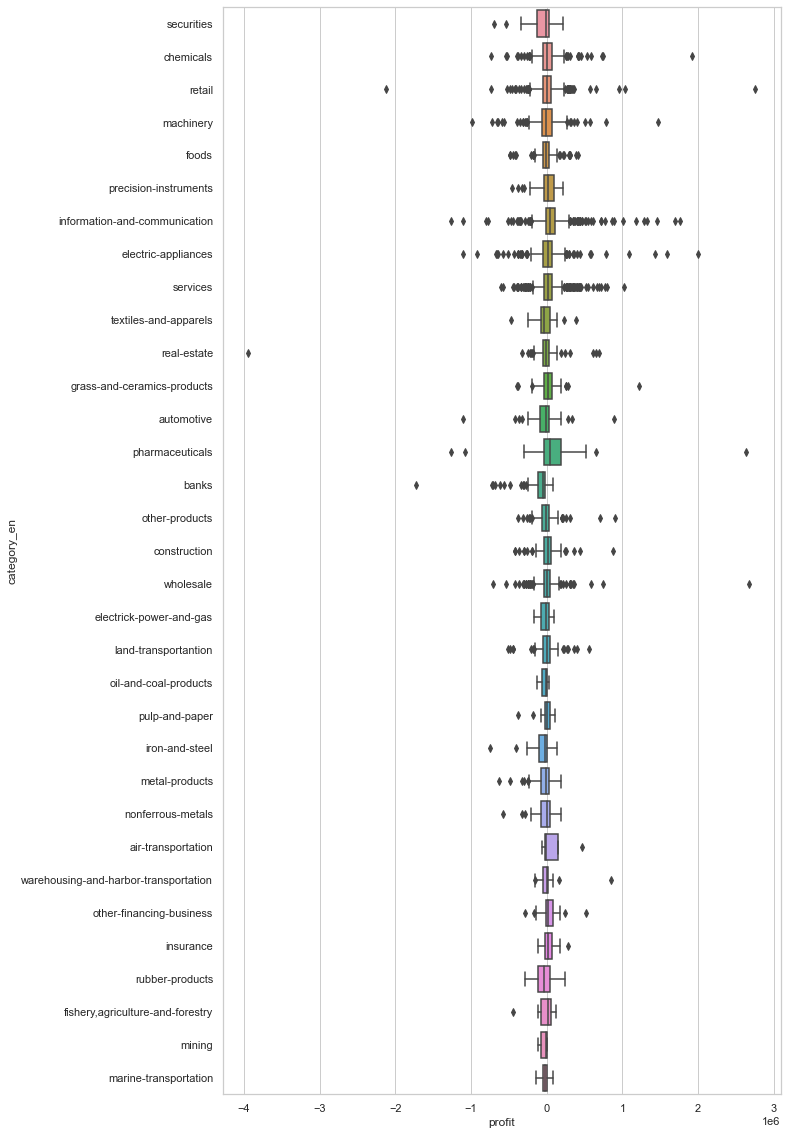

In [8]:
import matplotlib.pyplot as plt

df_box = df[df.category_en!='REIT']

sns.set(style="whitegrid")
plt.figure(figsize=(10.0, 20.0))
sns.boxplot(y="category_en", x="profit", data=df_box, orient='h')

# 業種別分析
戦略で利益が高い業種
- 情報通信業
- その他金融
- 医薬品
- 保険業
- 空輸業

<AxesSubplot:xlabel='profit', ylabel='category_en'>

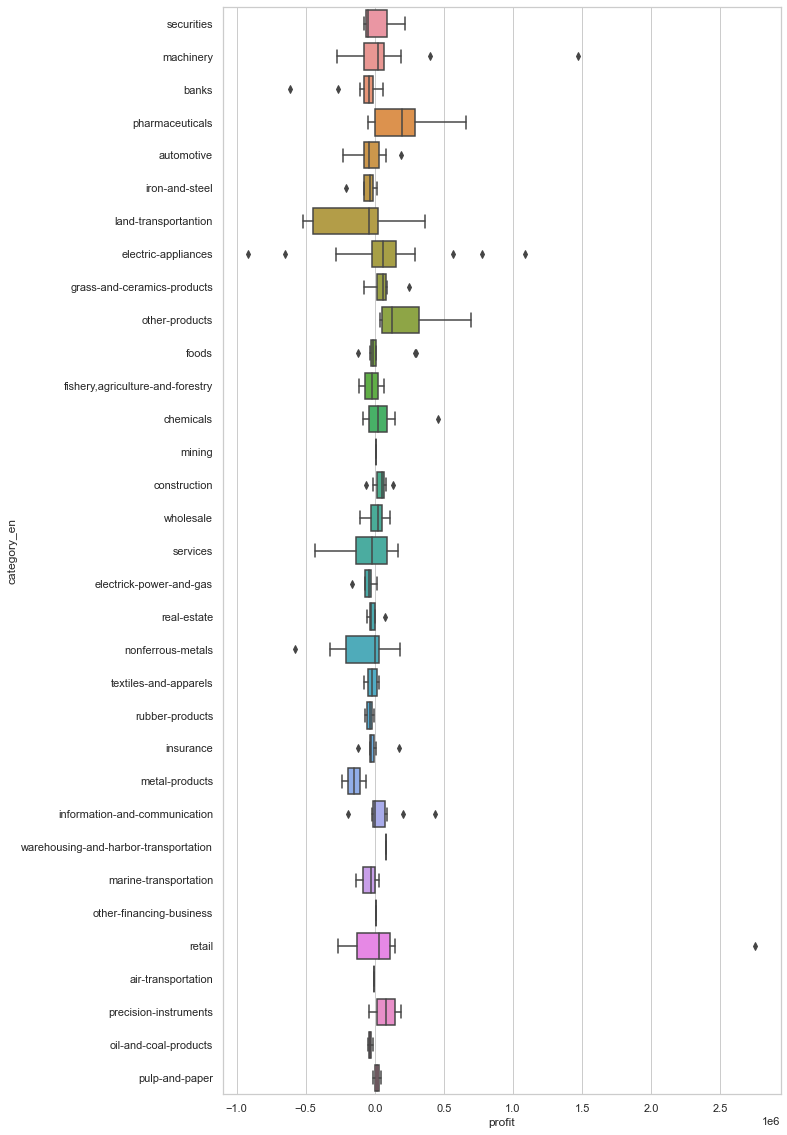

In [9]:
# nikkei225

import matplotlib.pyplot as plt

df_box = df[(df.category_en!='REIT') & df.nikkei]

sns.set(style="whitegrid")
plt.figure(figsize=(10.0, 20.0))
sns.boxplot(y="category_en", x="profit", data=df_box, orient='h')

# 業種別分析(日経225銘柄)
戦略で利益が高い業種
- 精密機械
- 医薬品
- 建設業
- 電気機器
- ガラス・土石製品
- その他製品
- 化学
- 卸売業
- パルプ・紙
- 倉庫・運輸関連業
- 情報通信業

In [12]:
df[df.category.isin(['情報・通信', '倉庫・運輸関連業', 'その他製品', '医薬品', '精密機器', '建設業']) & df.nikkei].sort_values(['category', 'profit'], ascending=False)

,code,profit,name,market,category,unit,nikkei,category_en
3158,4543.0,192600.0,テルモ(株),東証1部,精密機器,100,1.0,precision-instruments
994,7733.0,132106.0,オリンパス(株),東証1部,精密機器,100,1.0,precision-instruments
1878,7762.0,31624.0,シチズン時計(株),東証1部,精密機器,100,1.0,precision-instruments
1508,7731.0,-38536.0,(株)ニコン,東証1部,精密機器,100,1.0,precision-instruments
1518,9984.0,438900.0,ソフトバンクグループ(株),東証1部,情報・通信,100,1.0,information-and-communication
2130,4704.0,202000.0,トレンドマイクロ(株),東証1部,情報・通信,100,1.0,information-and-communication
2457,4689.0,86662.0,Ｚホールディングス(株),東証1部,情報・通信,100,1.0,information-and-communication
675,9613.0,25500.0,(株)ＮＴＴデータ,東証1部,情報・通信,100,1.0,information-and-communication
2287,9766.0,8800.0,コナミホールディングス(株),東証1部,情報・通信,100,1.0,information-and-communication
2595,9437.0,1500.0,(株)ＮＴＴドコモ,東証1部,情報・通信,100,1.0,information-and-communication
